In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
df = pd.read_csv('Resources/lending_data.csv')
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Reviewing data for prediction
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


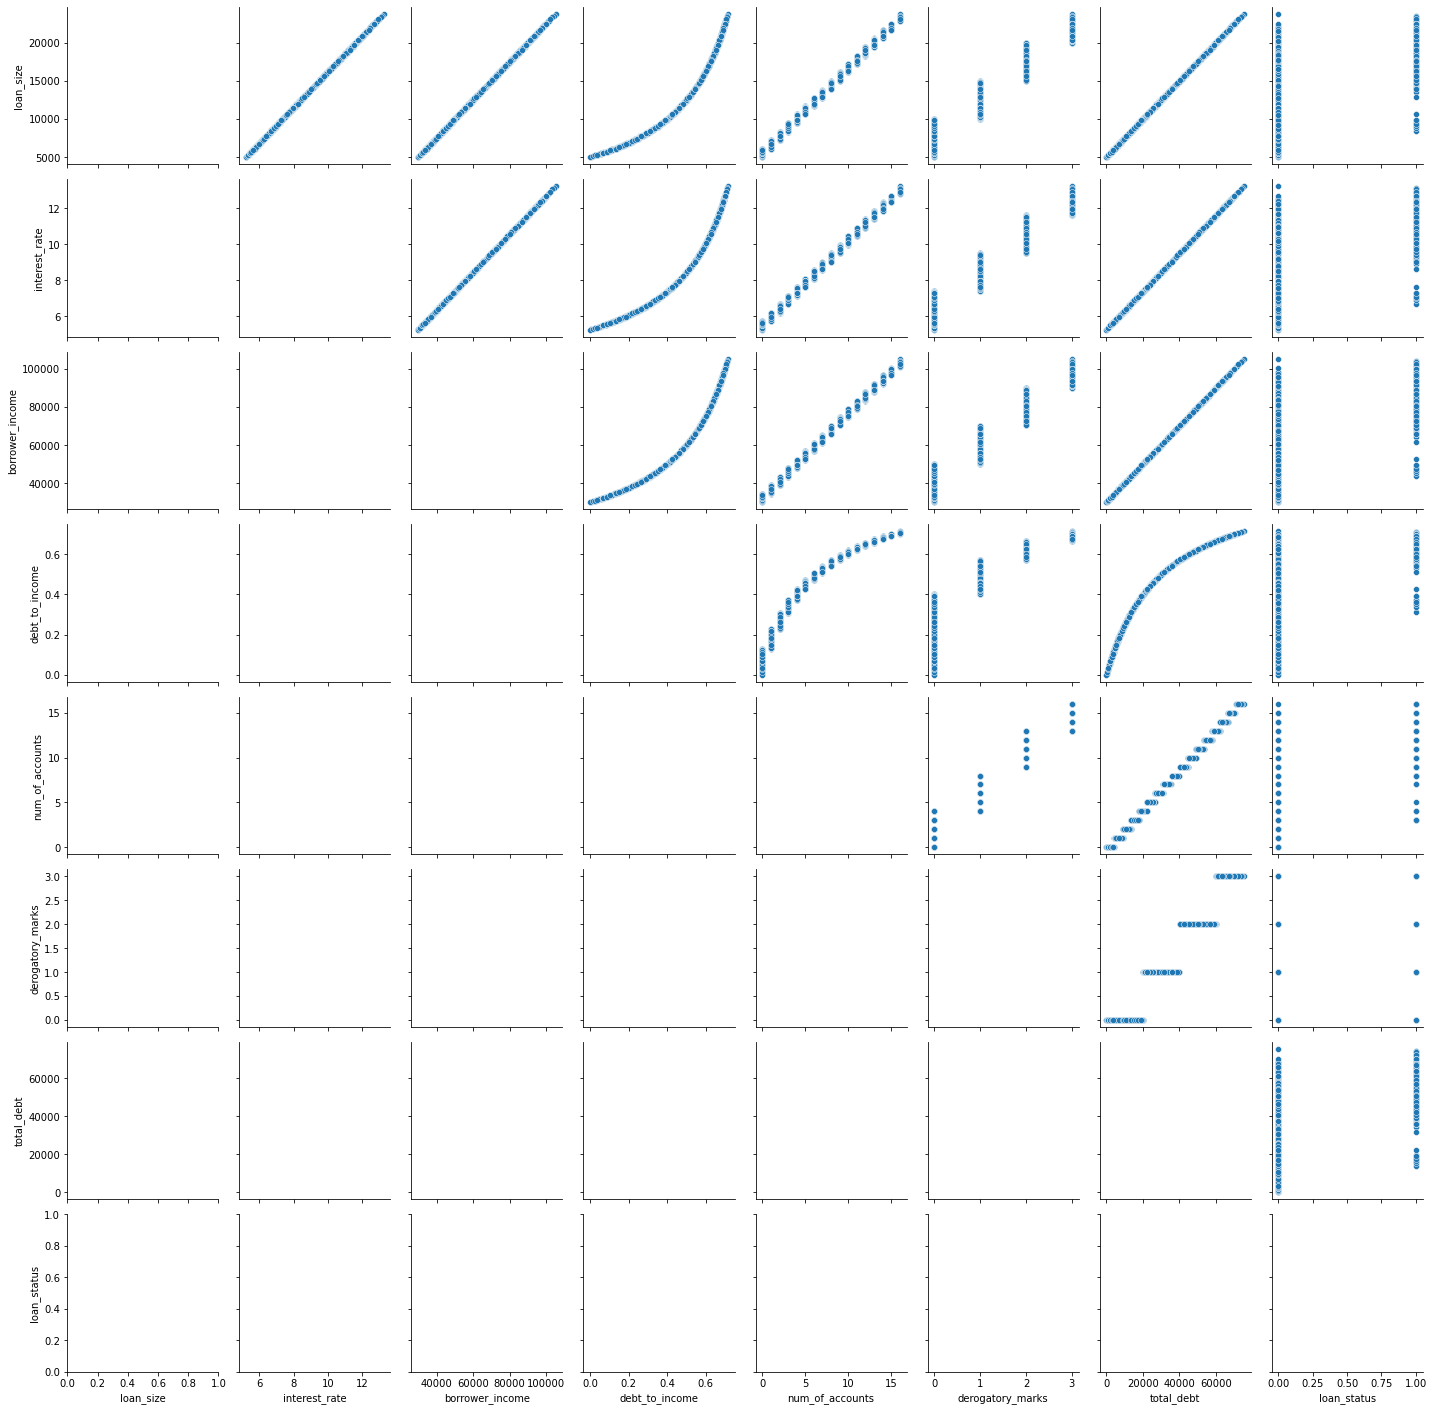

In [4]:
# Correlation Matrix to make all scatter plots at once

# importing seaborn package
import seaborn

# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
seaborn.PairGrid(df).map_upper(seaborn.scatterplot)

## Prediction:
Data will need to be scaled before attempting to fit models. From the plots above it appears the data is more linearly correlated; therefore the logistic regression should outperform random forest.

In [5]:
# Split the data into X_train, X_test, y_train, y_test
y = df["loan_status"].values
X = df.drop("loan_status", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
29175,8600.0,6.792,44500,0.325843,3,0,14500
23020,7800.0,6.419,41000,0.268293,2,0,11000
31269,10000.0,7.386,50100,0.401198,4,1,20100
35479,9300.0,7.093,47300,0.365751,3,0,17300
13470,9200.0,7.045,46900,0.360341,3,0,16900


In [6]:
# Train a Logistic Regression model print the model score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [7]:
# Train a Random Forest Classifier model and print the model score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9914878250103177


## Findings
Both models performed well, but the logistic did perform slightly better. The difference is very small between the two models (.9918 vs .9915) 